## Business Objectives

#### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

#### In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

#### To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough). 

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats
%matplotlib inline

### Data Inspection and Cleaning of Application Data

In [3]:
#read the data set of "application_data" in df_c. The data is about whether a client has payment difficulties.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_c= pd.read_csv("application_data.csv")
df_c.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#read the data set of "previous_application" in df_o. Its about the previous application had been Approved, Cancelled, Refused or Unused offer.
df_o= pd.read_csv("previous_application.csv")
df_o.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Check number of rows and columns in application_data
df_c.shape

(307511, 122)

In [6]:
#Check number of rows and columns in previous_application
df_o.shape

(1670214, 37)

In [7]:
#the information of variables to check their data types in application_data
df_c.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
#the information of variables to check their data types in previous_application
df_o.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
#Check descriptive statistics in application_data
df_c.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [10]:
#Check descriptive statistics in previous_application
df_o.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Data Cleaning and missing value treatment 

In [11]:
#Checking the percentage of null values in application data columns
perc_null=df_c.isnull().sum()/len(df_c)*100
perc_null.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

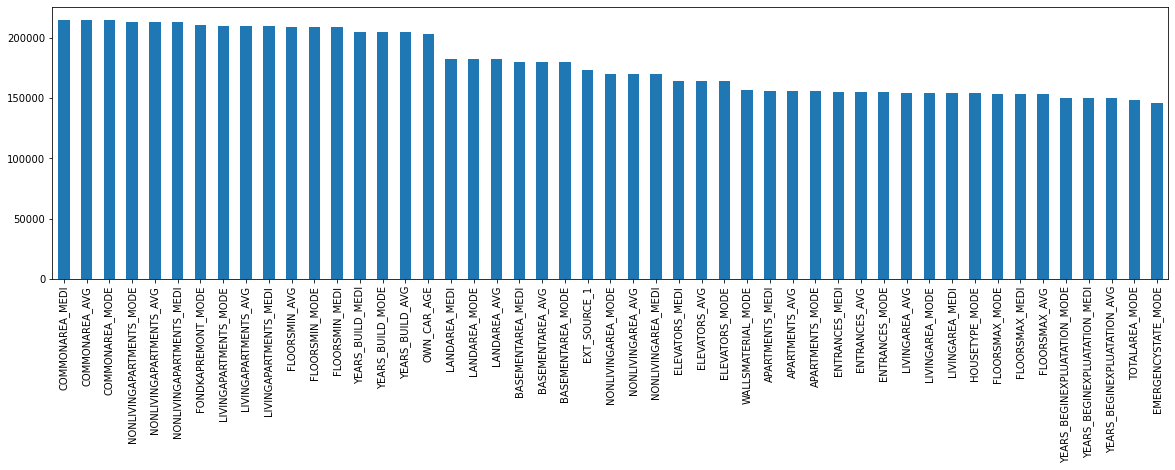

In [12]:
#to decide the cutoff percentage of null value for insignificant columns where client didn't respond any values
#bar chart plotted for list of columns where null values are greater than 45% (keeping the 'OCCUPATION_TYPE' & 'EXT_SOURCE_3' col)
Null_col = df_c.isnull().sum().sort_values(ascending=False)
Null_col_45perc = Null_col[Null_col.values>45/100*len(df_c)]
len(Null_col_45perc)

plt.figure(figsize=(20,5))
Null_col_45perc.plot(kind='bar')
plt.show()

In [13]:
#Dropping the insignificant columns with more than 45% Null Values

In [14]:
df_c=df_c.drop(labels=list(Null_col_45perc.index),axis=1,inplace=False)
df_c.shape


(307511, 73)

In [15]:
#Checking the percentage of null values in new dataframe
perc_null_new=df_c.isnull().sum()/len(df_c)*100
perc_null_new.sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [16]:
# Categorical columns

list(set(df_c.columns) - set(df_c.describe().columns))

['OCCUPATION_TYPE',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_HOUSING_TYPE']

In [17]:
# Numerical columns
df_c.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [18]:
#Occupation_type missing value imputation

In [19]:
df_c.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

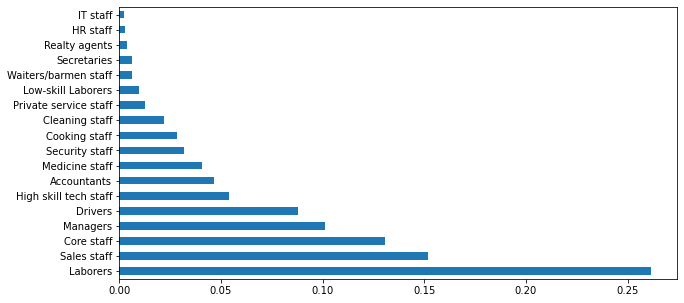

In [20]:
plt.figure(figsize=[10,5])
df_c.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [21]:
df_c.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [22]:
#For this categorical data, we can either drop the entries or impute the missing values with the mode Laborers. 
#here dropping missing value entries may lead to failure in detecting defaulters. For now we will keep the data as it is.


0.5352762504724826
0.5108529061800121
0    0.7463
dtype: float64


<AxesSubplot:ylabel='Frequency'>

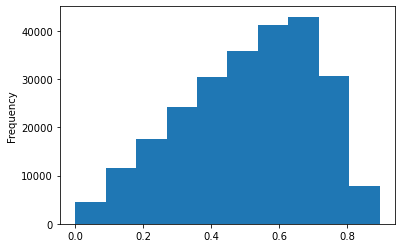

In [23]:
#Normalized value of EXT_SOURCE_3 is not significant for our analysis
print(df_c.EXT_SOURCE_3.median())
print(df_c.EXT_SOURCE_3.mean())
print(df_c.EXT_SOURCE_3.mode())
df_c.EXT_SOURCE_3.plot.hist()

In [24]:
df_c.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [25]:
df_c.AMT_REQ_CREDIT_BUREAU_YEAR.head(15)

0     1.0
1     0.0
2     0.0
3     NaN
4     0.0
5     1.0
6     2.0
7     0.0
8     1.0
9     NaN
10    0.0
11    2.0
12    0.0
13    1.0
14    NaN
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

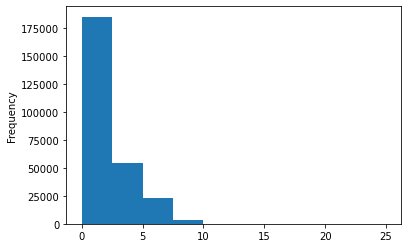

In [26]:
df_c.AMT_REQ_CREDIT_BUREAU_YEAR.plot.hist()
plt.show()

In [27]:
df_c.AMT_REQ_CREDIT_BUREAU_YEAR.unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [28]:
#AMT_REQ_CREDIT_BUREAU_YEAR has skewed distribution
#AMT_REQ_CREDIT_BUREAU_YEAR missing values can be imputed with either mode or median as the unique values are natural numbers and mean here is float type. 
#But as most of the no. of enquiries to Credit Bureau about client is 0, mode will be preferable
print(df_c.AMT_REQ_CREDIT_BUREAU_YEAR.median())
print(df_c.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print(df_c.AMT_REQ_CREDIT_BUREAU_YEAR.mean())

1.0
0    0.0
dtype: float64
1.899974435321363


In [29]:
#Similar to AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_MON, 
# AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR columns' missing value imputation can 
# be done with the mode
print(df_c.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print(df_c.AMT_REQ_CREDIT_BUREAU_QRT.mode())
print(df_c.AMT_REQ_CREDIT_BUREAU_MON.mode())
print(df_c.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
print(df_c.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print(df_c.AMT_REQ_CREDIT_BUREAU_HOUR.mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64


In [30]:
#These columns are not significant for analysis: NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, EXT_SOURCE_2                    

In [31]:
#checking the column "AMT_GOODS_PRICE"

In [32]:
df_c.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


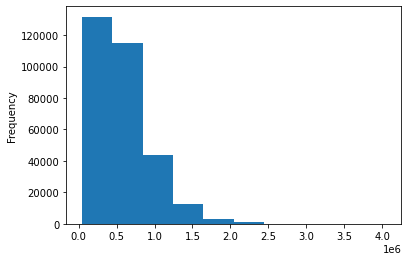

In [33]:
print(df_c.AMT_GOODS_PRICE.describe())
df_c.AMT_GOODS_PRICE.plot.hist()
plt.show()

In [34]:
#we can impute the missing value in AMT_GOODS_PRICE column with median value
print(df_c.AMT_GOODS_PRICE.median())
print(df_c.AMT_GOODS_PRICE.mean())

450000.0
538396.2074288895


In [35]:
df_c.AMT_GOODS_PRICE=df_c.AMT_GOODS_PRICE.fillna(df_c.AMT_GOODS_PRICE.median())

In [36]:
df_c.AMT_GOODS_PRICE.isna().sum()

0

In [37]:
#checking the column "AMT_ANNUITY"

In [38]:
df_c.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
29970.0      643
21775.5      643
30528.0      626
45000.0      570
32895.0      564
14350.5      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
24543.0      418
35937.0      418
25321.5      417
24246.0      4

In [39]:
#we can impute the missing value in AMT_ANNUITY column with median value
df_c.AMT_ANNUITY.median()

24903.0

In [40]:
df_c.AMT_ANNUITY = df_c.AMT_ANNUITY.fillna(df_c.AMT_ANNUITY.median())

In [41]:
df_c.AMT_ANNUITY.isna().sum()

0

### Checking erroneous data

In [42]:
#Converting the negative values of days to absolute values

In [43]:
print(df_c.DAYS_BIRTH.unique())
print(df_c.DAYS_EMPLOYED.unique())
print(df_c.DAYS_REGISTRATION.unique())
print(df_c.DAYS_ID_PUBLISH.unique())
print(df_c.DAYS_LAST_PHONE_CHANGE.unique())


[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [44]:
df_c.DAYS_BIRTH=abs(df_c.DAYS_BIRTH)
df_c.DAYS_EMPLOYED=abs(df_c.DAYS_EMPLOYED)
df_c.DAYS_REGISTRATION=abs(df_c.DAYS_REGISTRATION)
df_c.DAYS_ID_PUBLISH=abs(df_c.DAYS_ID_PUBLISH)
df_c.DAYS_LAST_PHONE_CHANGE=abs(df_c.DAYS_LAST_PHONE_CHANGE)


In [45]:
print(df_c.DAYS_BIRTH.unique())
print(df_c.DAYS_EMPLOYED.unique())
print(df_c.DAYS_REGISTRATION.unique())
print(df_c.DAYS_ID_PUBLISH.unique())
print(df_c.DAYS_LAST_PHONE_CHANGE.unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [46]:
#checking the categorical column CODE_GENDER

In [47]:
df_c.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [48]:
df_c.CODE_GENDER.mode()

0    F
dtype: object

In [49]:
#Replacing the XNA value with F


df_c.loc[df_c.CODE_GENDER=='XNA','CODE_GENDER']='F'

In [50]:
df_c.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [51]:
#checking the categorical column ORGANIZATION_TYPE
df_c.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [52]:
#Replace XNA with NaN
df_c.ORGANIZATION_TYPE=df_c.ORGANIZATION_TYPE.replace('XNA',np.NaN)

In [53]:
df_c.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### Binning Continuous variable for analysis 

In [54]:
#Binning AMT_INCOME_TOTAL in 5 groups
df_c['AMT_INCOME_RANGE']=pd.qcut(df_c.AMT_INCOME_TOTAL, q=[0,0.2,0.4,0.6,0.8,1], labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])
df_c.AMT_INCOME_RANGE.head()

0         HIGH
1    VERY_HIGH
2     VERY_LOW
3          LOW
4          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [55]:
#Binning AMT_CREDIT in 5 groups
df_c['AMT_CREDIT_RANGE']=pd.qcut(df_c.AMT_CREDIT, q=[0,0.2,0.4,0.6,0.8,1], labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])
df_c.AMT_CREDIT_RANGE.head()

0          LOW
1    VERY_HIGH
2     VERY_LOW
3          LOW
4       MEDIUM
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [56]:
#converting DAYS_BIRTH to age binned column
df_c['DAYS_BIRTH']=(df_c.DAYS_BIRTH/365).astype(int)
df_c.DAYS_BIRTH.unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [57]:
#Creating a column age group
df_c['AGE_GROUP']=pd.cut(df_c.DAYS_BIRTH, bins=[18,25,35,60,90], labels=['VERY_YOUNG','YOUNG','MIDDLE_AGE','SENIOR_CITIZEN'])
df_c.AGE_GROUP.head()

0    VERY_YOUNG
1    MIDDLE_AGE
2    MIDDLE_AGE
3    MIDDLE_AGE
4    MIDDLE_AGE
Name: AGE_GROUP, dtype: category
Categories (4, object): ['VERY_YOUNG' < 'YOUNG' < 'MIDDLE_AGE' < 'SENIOR_CITIZEN']

### Finding Outliers 

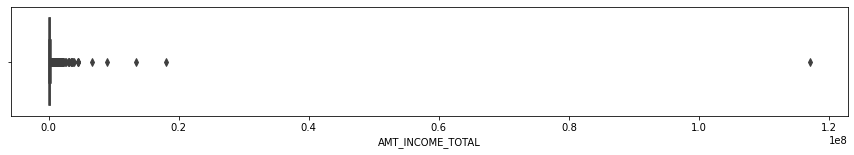

In [58]:
#boxplot of AMT_INCOME_TOTAL
plt.figure(figsize=[15,2])
sns.boxplot(df_c.AMT_INCOME_TOTAL)
plt.show()

In [59]:
df_c.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [60]:
#In the column 'AMT_INCOME_TOTAL', 1.17x10^8 is the outlier value

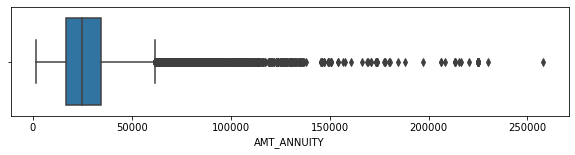

In [61]:
#boxplot of AMT_ANNUITY
plt.figure(figsize=[10,2])
sns.boxplot(df_c.AMT_ANNUITY)
plt.show()

In [62]:
df_c.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [63]:
#In the column 'AMT_ANNUITY', the value 258025.500 is an outlier

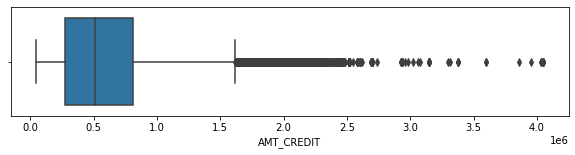

In [64]:
#boxplot of AMT_CREDIT
plt.figure(figsize=[10,2])
sns.boxplot(df_c.AMT_CREDIT)
plt.show()

In [65]:
df_c.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [66]:
#In the column 'AMT_CREDIT', the values greater than 3.5*10^6 can be said outlier.

### Checking for imbalance in TARGET 

In [67]:
df_c.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

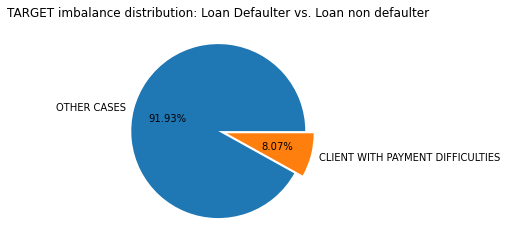

In [68]:
plt.pie(df_c.TARGET.value_counts(normalize=True)*100, labels=['OTHER CASES','CLIENT WITH PAYMENT DIFFICULTIES'],explode=(0,0.1),autopct='%1.2f%%')
plt.title('TARGET imbalance distribution: Loan Defaulter vs. Loan non defaulter')
plt.show()

In [69]:
#8.07% of target variables are defaulter

In [70]:
#Splitting the application data dataframe df_c into two parts based upon TARGET value
t0 = df_c.loc[df_c.TARGET == 0] #dataframe with non-defaulter targets
t1 = df_c.loc[df_c.TARGET == 1] #dataframe with defaulter targets

### Univariate Analysis of Categorical Variables

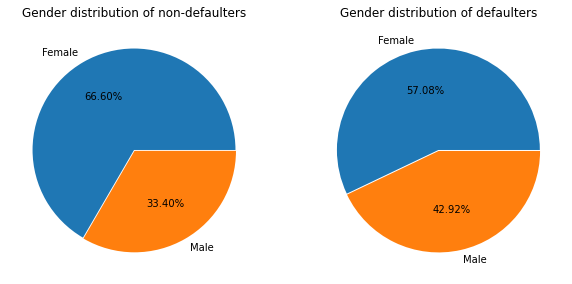

In [71]:
#Checking gender distribution for non-defaulters vs defaulters

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Gender distribution of non-defaulters')
plt.pie(t0.CODE_GENDER.value_counts(normalize=True)*100, labels=['Female','Male'],explode=(0,0.01),autopct='%1.2f%%')

plt.subplot(1,2,2)
plt.title('Gender distribution of defaulters')
plt.pie(t1.CODE_GENDER.value_counts(normalize=True)*100, labels=['Female','Male'],explode=(0,0.01),autopct='%1.2f%%')

plt.show()




So it can be observed that Females are majority in both cases though there is increase in Male percentages in case of payment difficulties.

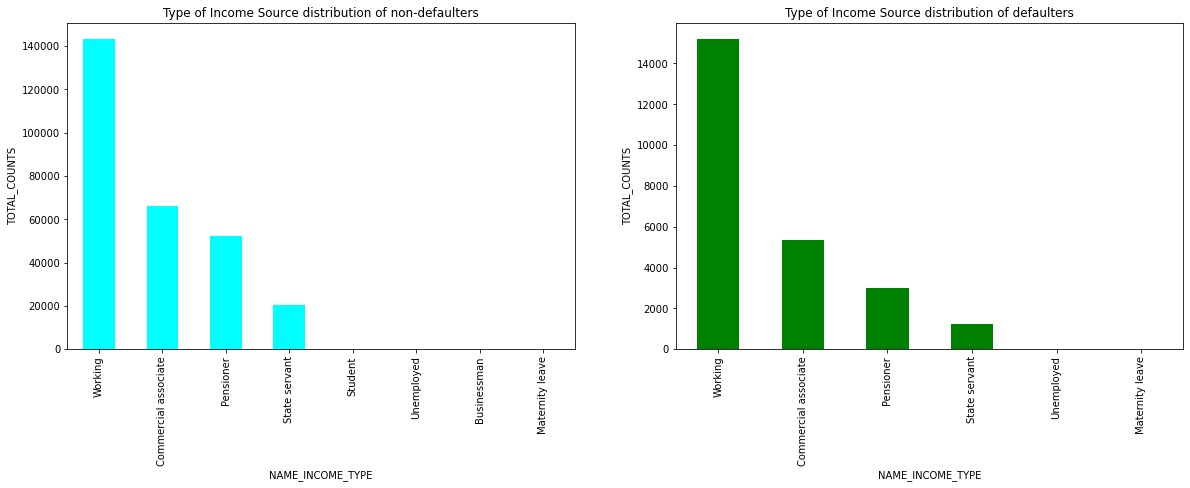

In [72]:
#Checking Income_Type distribution for non-defaulters vs defaulters

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Type of Income Source distribution of non-defaulters')
t0.NAME_INCOME_TYPE.value_counts().plot.bar(color='cyan')
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("TOTAL_COUNTS")


plt.subplot(1,2,2)
plt.title('Type of Income Source distribution of defaulters')
t1.NAME_INCOME_TYPE.value_counts().plot.bar(color='green')
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("TOTAL_COUNTS")

plt.show()

In [73]:
t0.NAME_INCOME_TYPE.value_counts(normalize=True)*100

Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64

In [74]:
t1.NAME_INCOME_TYPE.value_counts(normalize=True)*100

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

Student and Businessmasn have almost zero chances of becoming loan defaulter while loan defaulters numbers got increased when it comes to working class people. Above 50% loans distributed among Working type income source fellows for defaulters and non defaulters both cases.

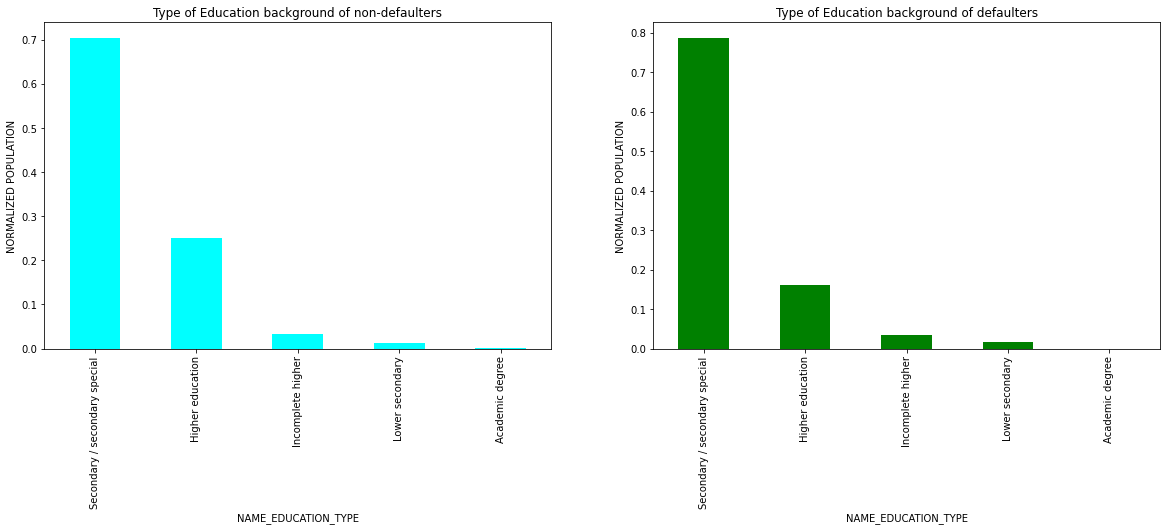

In [75]:
#Checking Education_Type distribution for non-defaulters vs defaulters

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Type of Education background of non-defaulters')
t0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color='cyan')
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("NORMALIZED POPULATION")


plt.subplot(1,2,2)
plt.title('Type of Education background of defaulters')
t1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color='green')
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("NORMALIZED POPULATION")

plt.show()

In [76]:
t0.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64

In [77]:
t1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64

Most of the loan distributed to clients with secondary education (Above 70%). Higher educated people are less likely to default but secondary / secondary special educated people are more likely to default.

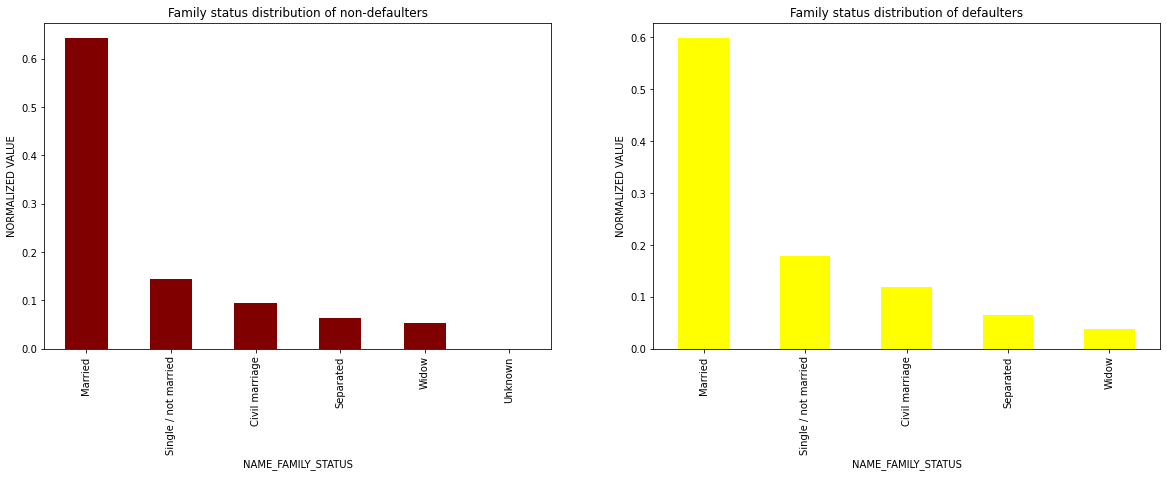

In [78]:
#Checking Family_Status distribution for non-defaulters vs defaulters

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Family status distribution of non-defaulters')
t0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color='maroon')
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("NORMALIZED VALUE")


plt.subplot(1,2,2)
plt.title('Family status distribution of defaulters')
t1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color='yellow')
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("NORMALIZED VALUE")

plt.show()

In [79]:
t0.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 64.234522
Single / not married    14.499126
Civil marriage           9.485436
Separated                6.420551
Widow                    5.359657
Unknown                  0.000707
Name: NAME_FAMILY_STATUS, dtype: float64

In [80]:
t1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64

Married people applied for most of the loan (~60%). Chances of default increases when it comes to Single/not married folks.

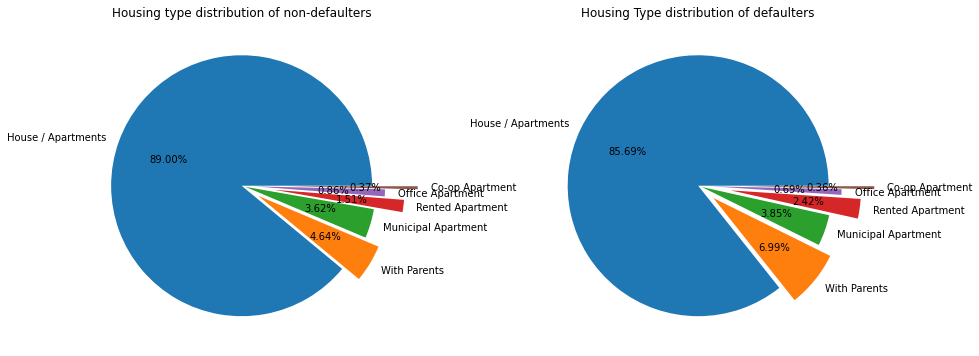

In [81]:
#Checking Housing Type distribution for non-defaulters vs defaulters

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Housing type distribution of non-defaulters')
plt.pie(t0.NAME_HOUSING_TYPE.value_counts(normalize=True)*100, labels=['House / Apartments','With Parents','Municipal Apartment','Rented Apartment','Office Apartment','Co-op Apartment'],explode=(0,0.15,0.03,0.25,0.1,0.35),autopct='%1.2f%%')

plt.subplot(1,2,2)
plt.title('Housing Type distribution of defaulters')
plt.pie(t1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100, labels=['House / Apartments','With Parents','Municipal Apartment','Rented Apartment','Office Apartment','Co-op Apartment'],explode=(0,0.15,0.03,0.25,0.1,0.35),autopct='%1.2f%%')

plt.show()

Above 85% people who have house / apartmnets applied for the most of the loan however people living with parents tend to default more.

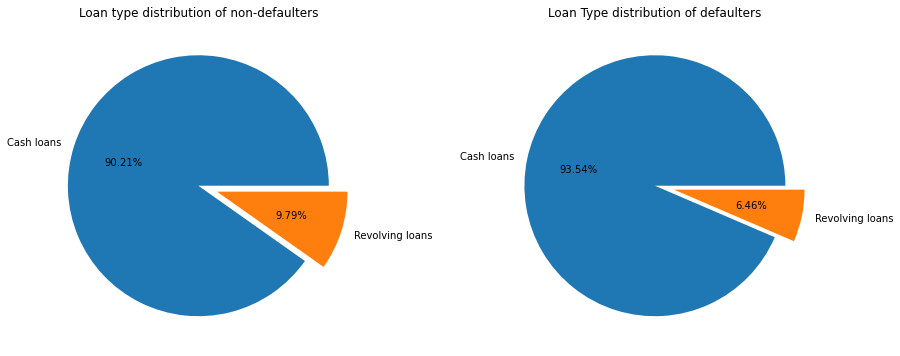

In [82]:
#Checking Loan Type distribution for non-defaulters vs defaulters

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Loan type distribution of non-defaulters')
plt.pie(t0.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100, labels=['Cash loans','Revolving loans'],explode=(0,0.15),autopct='%1.2f%%')

plt.subplot(1,2,2)
plt.title('Loan Type distribution of defaulters')
plt.pie(t1.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100, labels=['Cash loans','Revolving loans'],explode=(0,0.15),autopct='%1.2f%%')

plt.show()

Above 90% loans are cash loans. There is increase in percentage of cash loans defaulters against non-defaulters

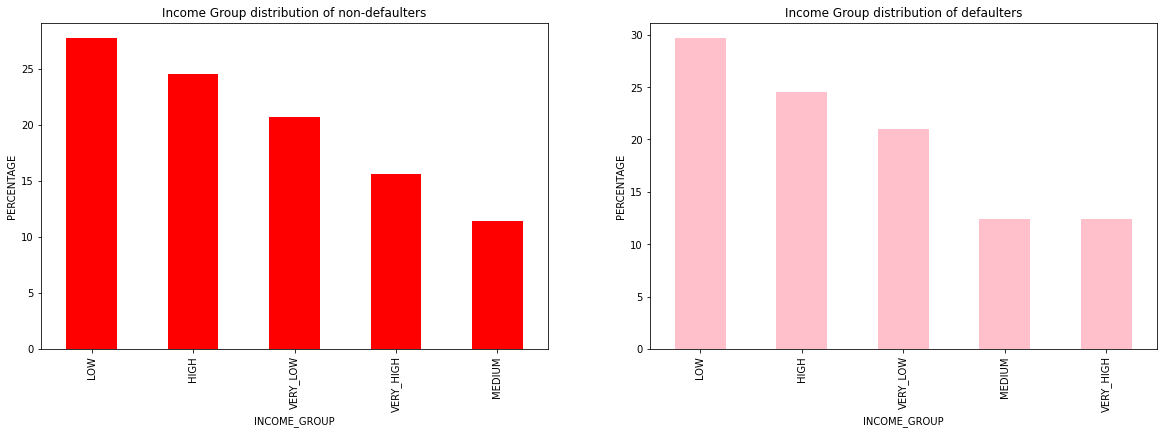

In [83]:
#Checking Income_range distribution for non-defaulters vs defaulters

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Income Group distribution of non-defaulters')
(t0.AMT_INCOME_RANGE.value_counts(normalize=True)*100).plot.bar(color='red')
plt.xlabel("INCOME_GROUP")
plt.ylabel("PERCENTAGE")


plt.subplot(1,2,2)
plt.title('Income Group distribution of defaulters')
(t1.AMT_INCOME_RANGE.value_counts(normalize=True)*100).plot.bar(color='pink')
plt.xlabel("INCOME_GROUP")
plt.ylabel("PERCENTAGE")

plt.show()

Chances of people belongs to very high income group becoming defaulter is less whereas low income group tends to default is more

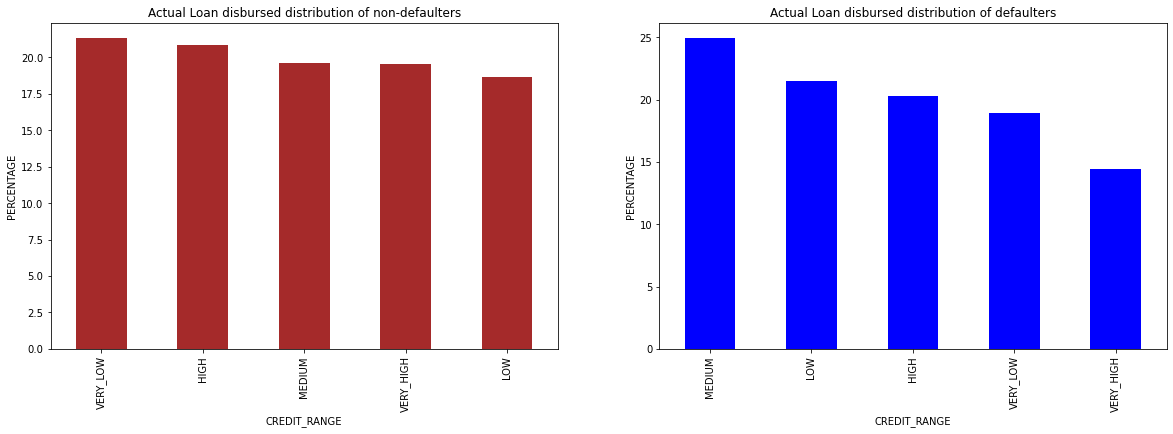

In [84]:
#Checking Credit_range distribution for non-defaulters vs defaulters

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Actual Loan disbursed distribution of non-defaulters')
(t0.AMT_CREDIT_RANGE.value_counts(normalize=True)*100).plot.bar(color='brown')
plt.xlabel("CREDIT_RANGE")
plt.ylabel("PERCENTAGE")


plt.subplot(1,2,2)
plt.title('Actual Loan disbursed distribution of defaulters')
(t1.AMT_CREDIT_RANGE.value_counts(normalize=True)*100).plot.bar(color='blue')
plt.xlabel("CREDIT_RANGE")
plt.ylabel("PERCENTAGE")

plt.show()

Chances of medium and low loan credited group becoming defaulter is more.

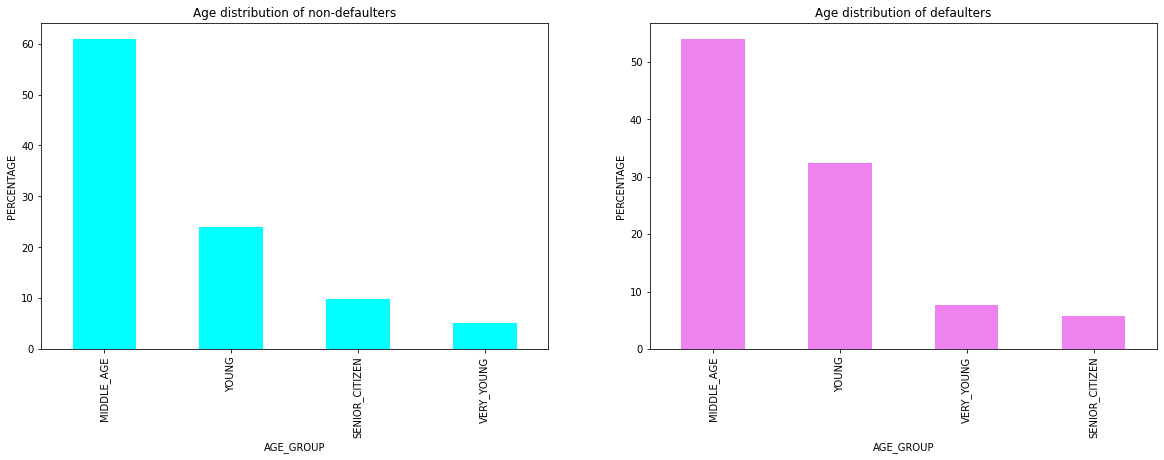

In [85]:
#Checking Age distribution for non-defaulters vs defaulters

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Age distribution of non-defaulters')
(t0.AGE_GROUP.value_counts(normalize=True)*100).plot.bar(color='cyan')
plt.xlabel("AGE_GROUP")
plt.ylabel("PERCENTAGE")


plt.subplot(1,2,2)
plt.title('Age distribution of defaulters')
(t1.AGE_GROUP.value_counts(normalize=True)*100).plot.bar(color='violet')
plt.xlabel("AGE_GROUP")
plt.ylabel("PERCENTAGE")

plt.show()

In [86]:
t1.AGE_GROUP.value_counts(normalize=True)*100

MIDDLE_AGE        54.086606
YOUNG             32.374622
VERY_YOUNG         7.718026
SENIOR_CITIZEN     5.820745
Name: AGE_GROUP, dtype: float64

While most of the defaulter people belongs to Middle age group (>50%), chances of becoming defaulter is less compare to non-defaulter distribution. But percentage of people belong to Young age group (>30%) is more in defaulter category compare to non-defaulter category.
So 25-35 Young age group is risk prone to give loan.

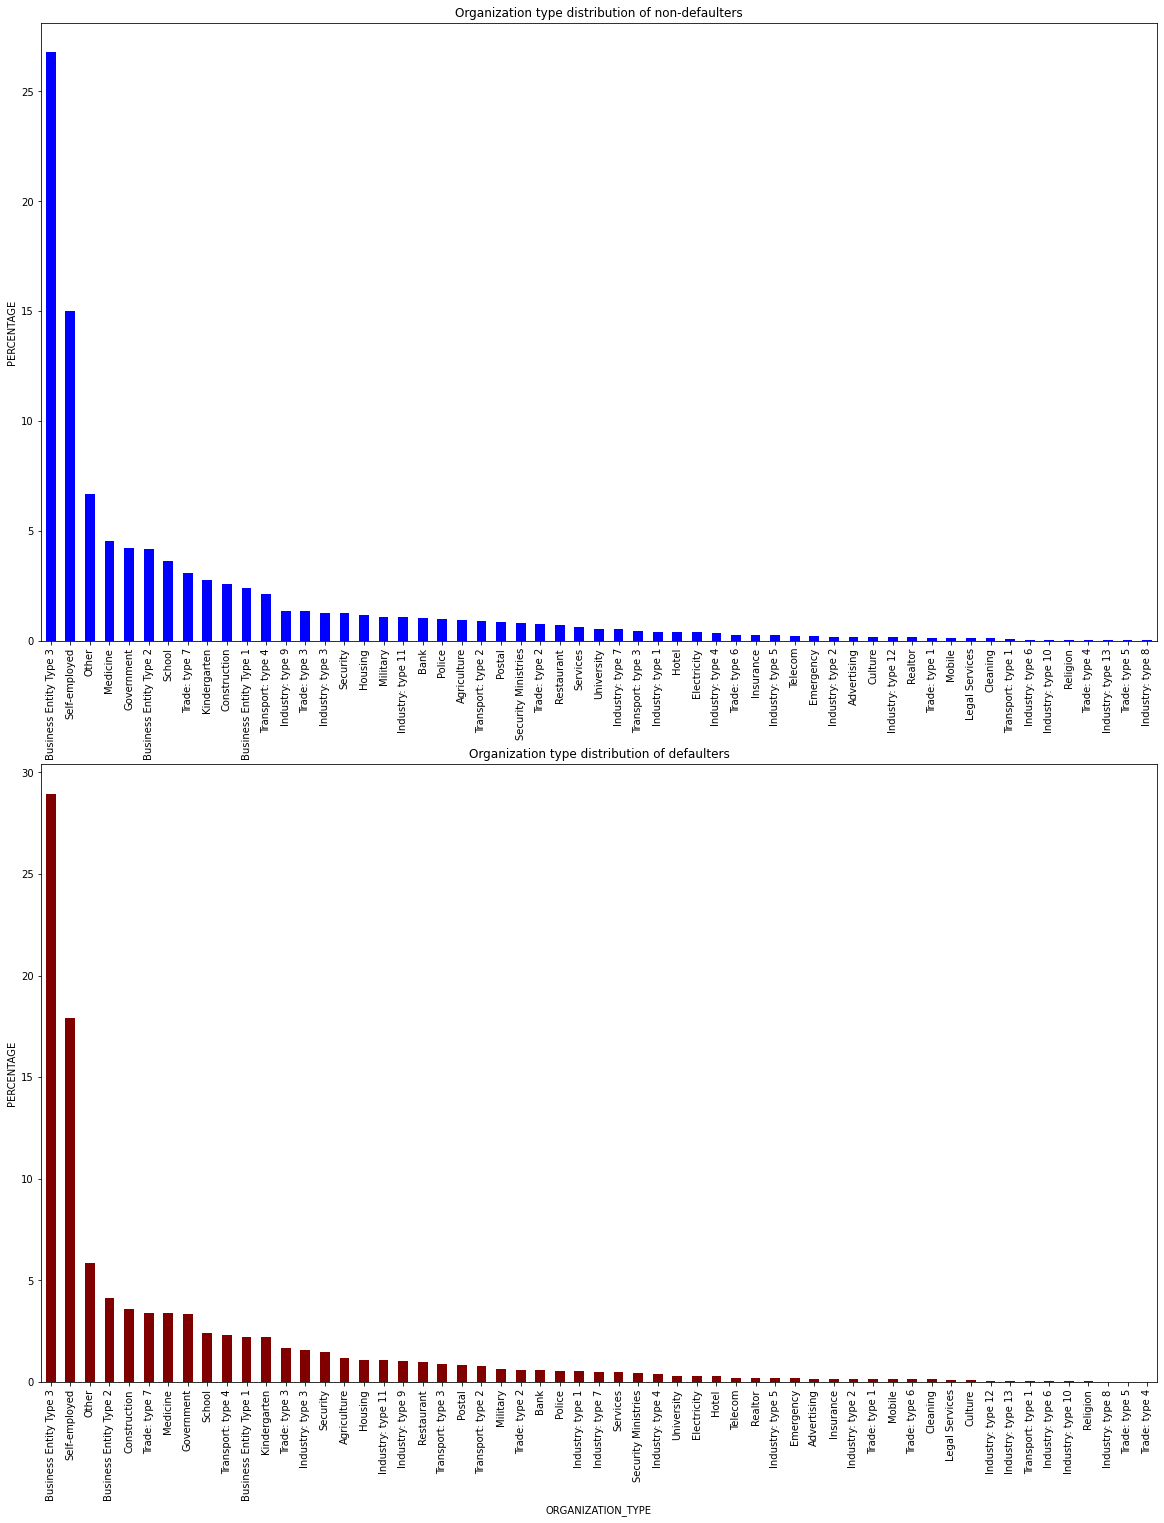

In [87]:
#Checking Organization type distribution for non-defaulters vs defaulters

plt.figure(figsize=(20,25))
plt.subplot(2,1,1)
plt.title('Organization type distribution of non-defaulters')
(t0.ORGANIZATION_TYPE.value_counts(normalize=True)*100).plot.bar(color='blue')
plt.xlabel("ORGANIZATION_TYPE")
plt.ylabel("PERCENTAGE")


plt.subplot(2,1,2)
plt.title('Organization type distribution of defaulters')
(t1.ORGANIZATION_TYPE.value_counts(normalize=True)*100).plot.bar(color='maroon')
plt.xlabel("ORGANIZATION_TYPE")
plt.ylabel("PERCENTAGE")

plt.show()

Percentage of people who are self-employed are more in defaulters group compare to non-defaulters group.

### Univariate Analysis of Numerical Variables 

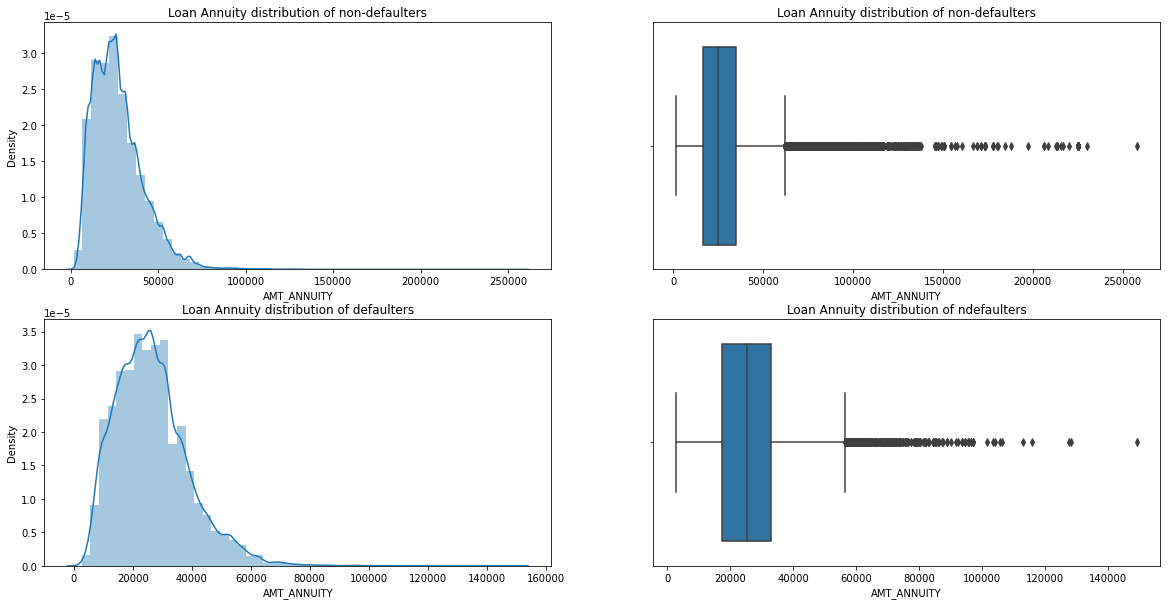

In [88]:
#Checking Loan Annuity distribution for non-defaulters vs defaulters

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Loan Annuity distribution of non-defaulters')
sns.distplot(t0.AMT_ANNUITY)

plt.subplot(2,2,2)
plt.title('Loan Annuity distribution of non-defaulters')
sns.boxplot(t0.AMT_ANNUITY)



plt.subplot(2,2,3)
plt.title('Loan Annuity distribution of defaulters')
sns.distplot(t1.AMT_ANNUITY)

plt.subplot(2,2,4)
plt.title('Loan Annuity distribution of ndefaulters')
sns.boxplot(t1.AMT_ANNUITY)


plt.show()

In [89]:
t1.AMT_ANNUITY.describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

The distribution is right skewed distribution, number of loan annuity with higher amount is lesser compare to number of small loan annuity. The trend of loan defaulting is higher between the range of 17k to 33k loan annuity.

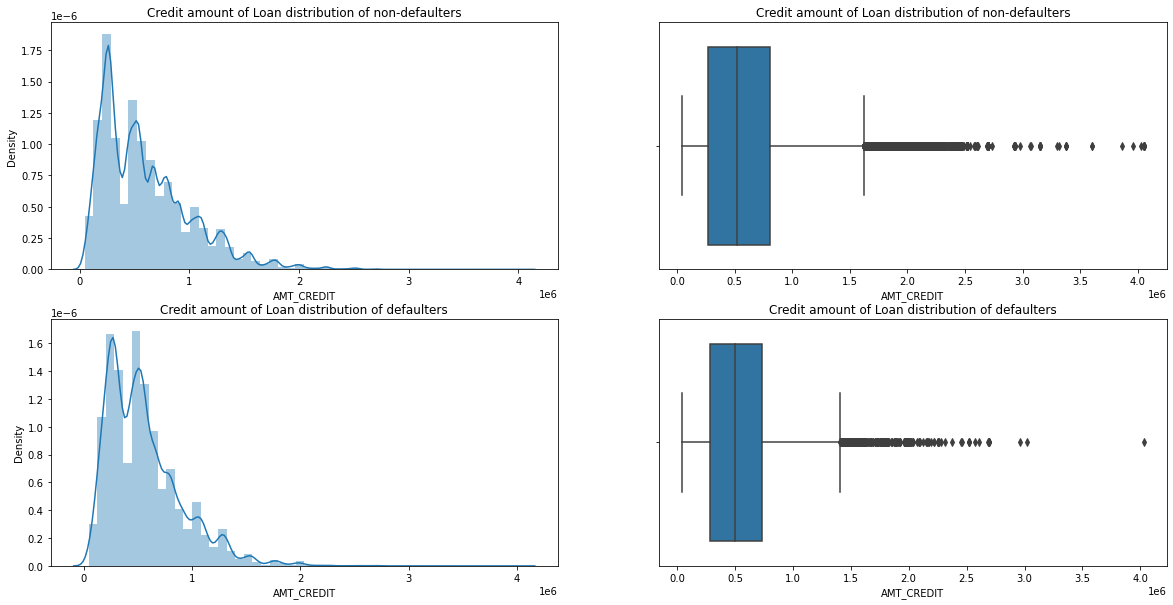

In [90]:
#Checking Credit amount of Loan distribution for non-defaulters vs defaulters

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Credit amount of Loan distribution of non-defaulters')
sns.distplot(t0.AMT_CREDIT)

plt.subplot(2,2,2)
plt.title('Credit amount of Loan distribution of non-defaulters')
sns.boxplot(t0.AMT_CREDIT)



plt.subplot(2,2,3)
plt.title('Credit amount of Loan distribution of defaulters')
sns.distplot(t1.AMT_CREDIT)

plt.subplot(2,2,4)
plt.title('Credit amount of Loan distribution of defaulters')
sns.boxplot(t1.AMT_CREDIT)


plt.show()

In [91]:
t1.AMT_CREDIT.describe()

count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

The distribution is right skewed distribution, number of small loan credited is much more compare to number of bigger credited loan. The trend of loan defaulting is higher between the range of 2.8 lac to 7.3 lac loan credited.

### Bivariate analysis of categorical vs numerical  

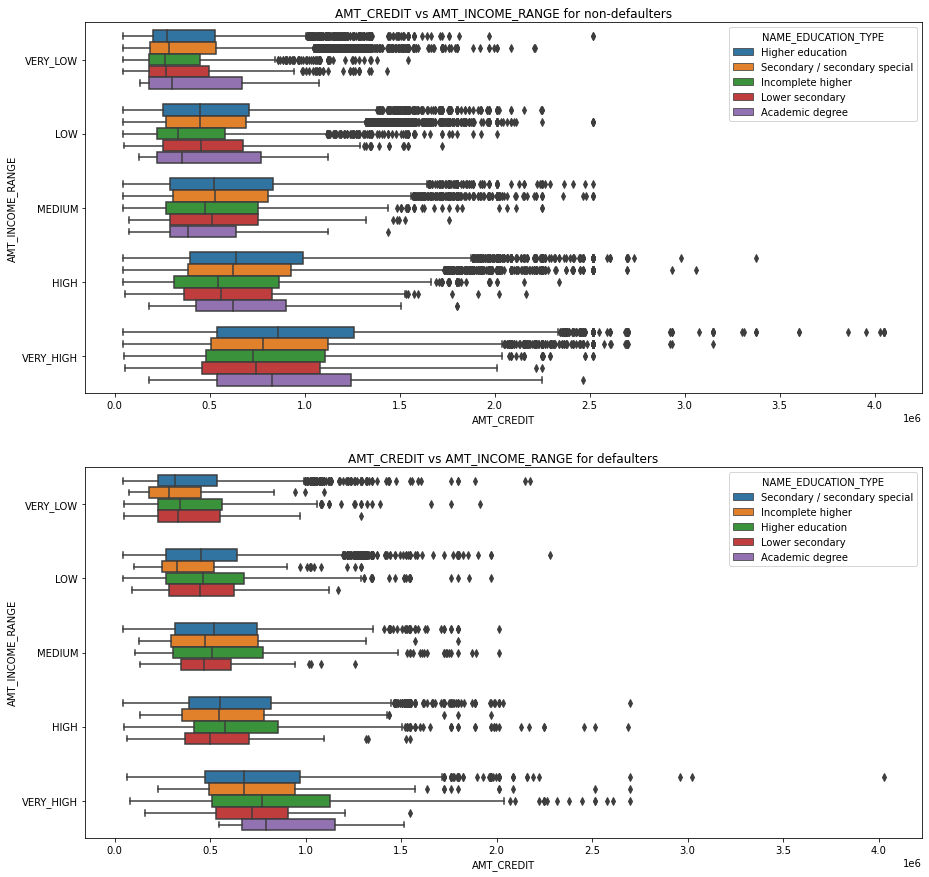

In [92]:
#AMT_CREDIT vs AMT_INCOME_RANGE  for non-defaulters vs defaulters Grouped by NAME_EDUCATION_TYPE

plt.figure(figsize=(15,15))


plt.subplot(2,1,1)
plt.title('AMT_CREDIT vs AMT_INCOME_RANGE for non-defaulters')
sns.boxplot(t0.AMT_CREDIT,t0.AMT_INCOME_RANGE,t0.NAME_EDUCATION_TYPE)





plt.subplot(2,1,2)
plt.title('AMT_CREDIT vs AMT_INCOME_RANGE for defaulters')
sns.boxplot(t1.AMT_CREDIT,t1.AMT_INCOME_RANGE,t1.NAME_EDUCATION_TYPE)


plt.show()

There are no people with academic degree in Very low, low, medium, high income range group who has become defaulter. So there is minimum risk associated when giving loan to a person with academic degree.

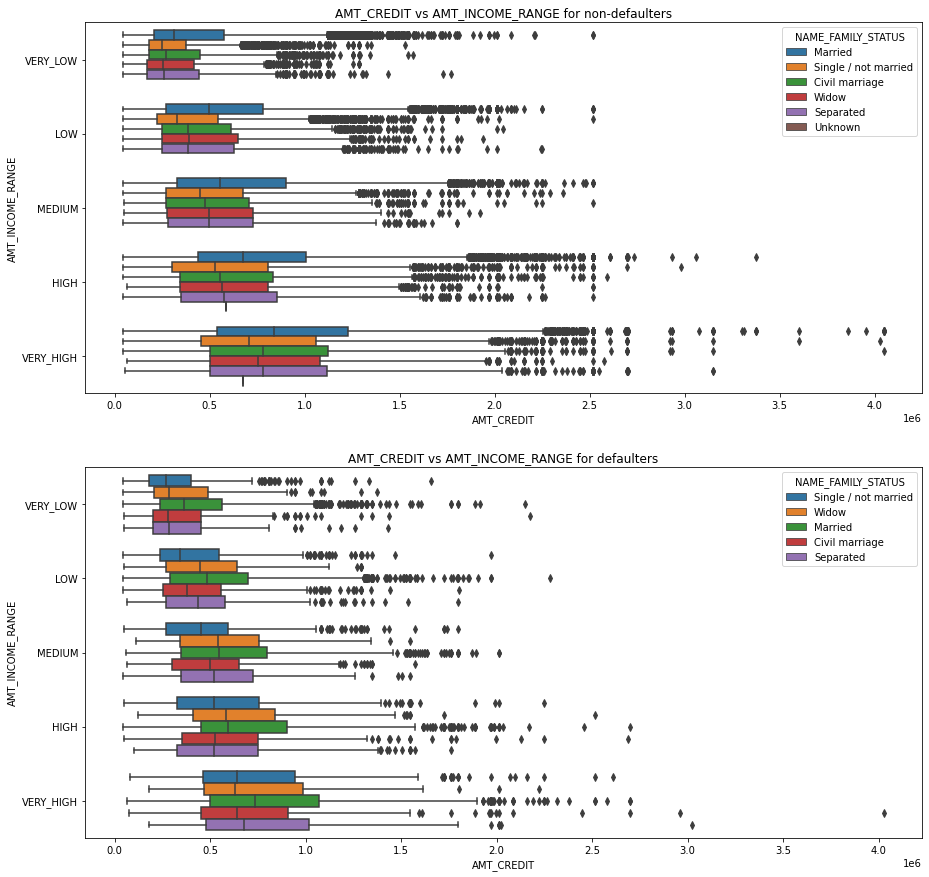

In [93]:
#AMT_CREDIT vs NAME_EDUCATION_TYPE  for non-defaulters vs defaulters Grouped by NAME_FAMILY_STATUS

plt.figure(figsize=(15,15))


plt.subplot(2,1,1)
plt.title('AMT_CREDIT vs AMT_INCOME_RANGE for non-defaulters')
sns.boxplot(t0.AMT_CREDIT,t0.AMT_INCOME_RANGE,t0.NAME_FAMILY_STATUS)





plt.subplot(2,1,2)
plt.title('AMT_CREDIT vs AMT_INCOME_RANGE for defaulters')
sns.boxplot(t1.AMT_CREDIT,t1.AMT_INCOME_RANGE,t1.NAME_FAMILY_STATUS)


plt.show()

In low and high income range, non payment difficulty is higher with Single / not married family status person. In average credited amount is higher with married people across all income range.

### Bivariate analysis of Numerical vs Numerical  variables

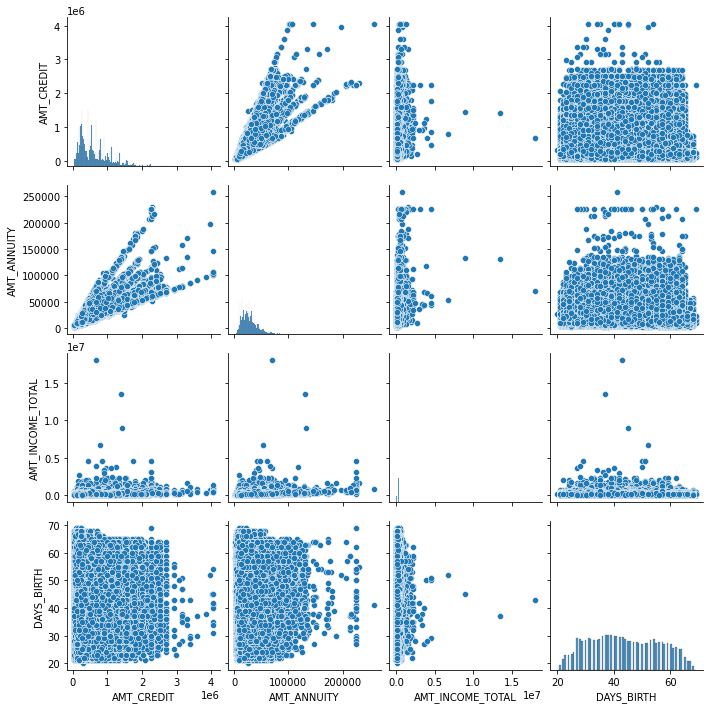

In [94]:
#non-defaulters
sns.pairplot(t0[['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','DAYS_BIRTH']])
plt.show()

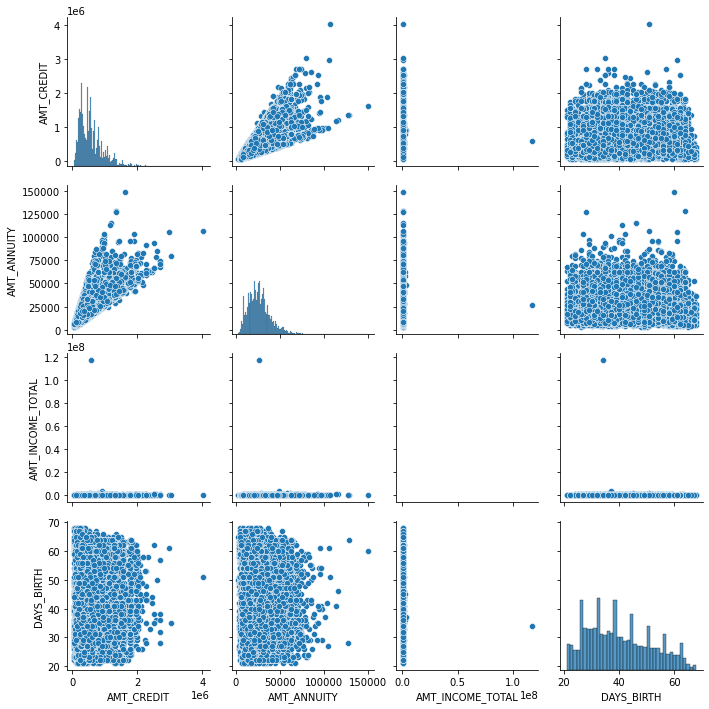

In [95]:
#defaulters
sns.pairplot(t1[['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','DAYS_BIRTH']])
plt.show()

In [96]:
#Getting the top 10 correlation in t0 (non-defaulters)
corr=t0.corr()
corr_t0 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_t0.columns=['Col1','Col2','Correlation']
corr_t0.dropna(subset=['Correlation'],inplace=True)
corr_t0['Absolute_value_Correlation']=corr_t0['Correlation'].abs()
corr_t0 = corr_t0.sort_values(by=['Absolute_value_Correlation'], ascending=False)
corr_t0.head(10)

,Col1,Col2,Correlation,Absolute_value_Correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508,0.998508
370,AMT_GOODS_PRICE,AMT_CREDIT,0.987022,0.987022
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332,0.859332
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381,0.830381
371,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421,0.776421
309,AMT_ANNUITY,AMT_CREDIT,0.771297,0.771297


In [97]:
#Getting the top 10 correlation in t1 (defaulters)
corr=t1.corr()
corr_t1 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_t1.columns=['Col1','Col2','Correlation']
corr_t1.dropna(subset=['Correlation'],inplace=True)
corr_t1['Absolute_value_Correlation']=corr_t1['Correlation'].abs()
corr_t1 = corr_t1.sort_values(by=['Absolute_value_Correlation'], ascending=False)
corr_t1.head(10)

,Col1,Col2,Correlation,Absolute_value_Correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269,0.998269
370,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994,0.868994
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540,0.778540
371,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
309,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195


So it can be observed that Credit amount of loan has a strong positive correlation with price of the goods for which loan has been given. 

### Analysis of previous application Data 

In [98]:
df_o.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df_o.shape

(1670214, 37)

In [100]:
df_o = df_o.loc[:,df_o.isnull().mean()<=0.5]
df_o.shape

(1670214, 33)

In [101]:
#Changing negative values of column with DAYS to positive values

In [102]:
df_o[[col for col in df_o if col.startswith('DAYS')]]=abs(df_o[[col for col in df_o if col.startswith('DAYS')]])

In [103]:
df_o.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#XNA and XAP replaced by NAN
df_o=df_o.replace('XNA', np.NAN)
df_o=df_o.replace('XAP', np.NAN)

### Univariate analysis on previous application data 

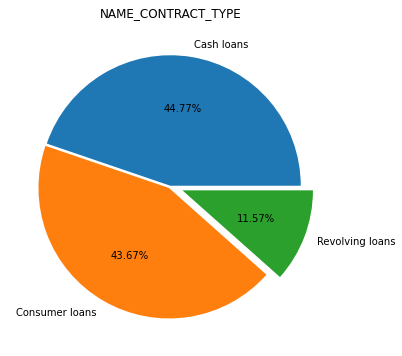

In [105]:
#Type of Contract

plt.figure(figsize=(10,6))
plt.title('NAME_CONTRACT_TYPE')
plt.pie(df_o.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100, labels=['Cash loans','Consumer loans','Revolving loans'],explode=(0,0.02,0.1),autopct='%1.2f%%')
plt.show()

Majority of loans (88%) applied for Cash and consumer loans.

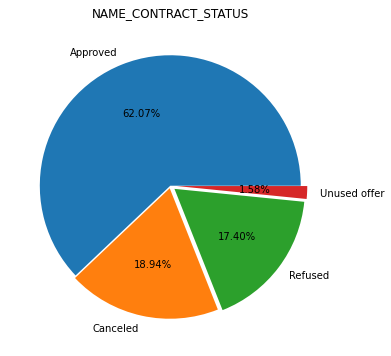

In [106]:
#Status of loan application

plt.figure(figsize=(10,6))
plt.title('NAME_CONTRACT_STATUS')
plt.pie(df_o.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100, labels=['Approved','Canceled','Refused','Unused offer'],explode=(0,0.02,0.04,0.05),autopct='%1.2f%%')
plt.show()

Majority of the loans (>60%) were approved.

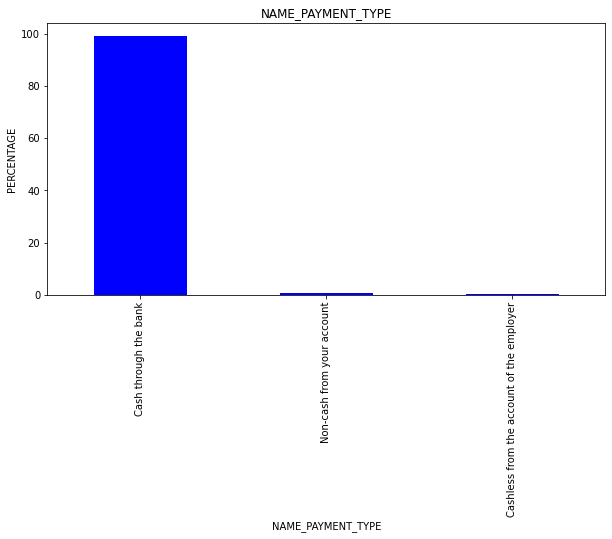

In [107]:
#Payment Type

plt.figure(figsize=(10,5))
plt.title('NAME_PAYMENT_TYPE')
(df_o.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100).plot.bar(color='blue')
plt.xlabel("NAME_PAYMENT_TYPE")
plt.ylabel("PERCENTAGE")
plt.show()

In [108]:
df_o.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100

Cash through the bank                        99.110306
Non-cash from your account                    0.785651
Cashless from the account of the employer     0.104044
Name: NAME_PAYMENT_TYPE, dtype: float64

99.11% of clients choose to pay cash through the bank

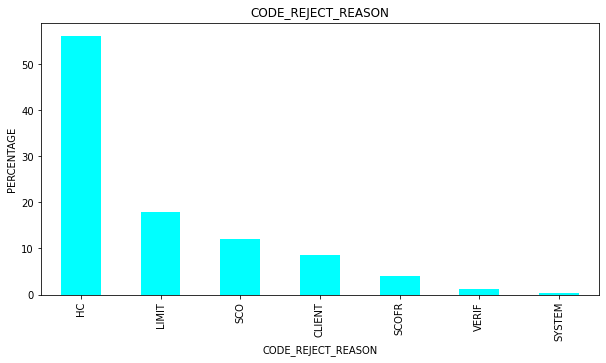

In [109]:
#Reason of loan rejection

plt.figure(figsize=(10,5))
plt.title('CODE_REJECT_REASON')
(df_o.CODE_REJECT_REASON.value_counts(normalize=True)*100).plot.bar(color='cyan')
plt.xlabel("CODE_REJECT_REASON")
plt.ylabel("PERCENTAGE")
plt.show()

In [110]:
df_o.CODE_REJECT_REASON.value_counts(normalize=True)*100

HC        56.185932
LIMIT     17.853192
SCO       12.013390
CLIENT     8.476419
SCOFR      4.107709
VERIF      1.133460
SYSTEM     0.229898
Name: CODE_REJECT_REASON, dtype: float64

HC is the main reason (>55%). HC means high credit. high credit limit is used to determine debt-to-limit ratio, which is how much debt clients are carrying in relation to how much debt clients are permitted to carry. If debt is too high in relation to limit, it will hurt credit score and as a result the loan will be disapproved.

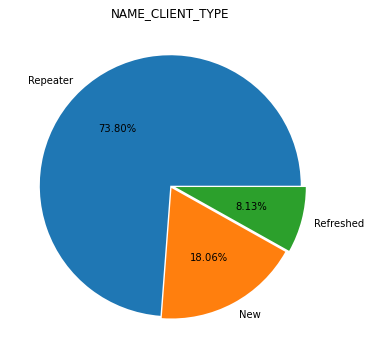

In [111]:
#Repeater vs new clients

plt.figure(figsize=(10,6))
plt.title('NAME_CLIENT_TYPE')
plt.pie(df_o.NAME_CLIENT_TYPE.value_counts(normalize=True)*100, labels=['Repeater','New','Refreshed'],explode=(0,0.02,0.04),autopct='%1.2f%%')
plt.show()

More than 70% clients are Repeaters.

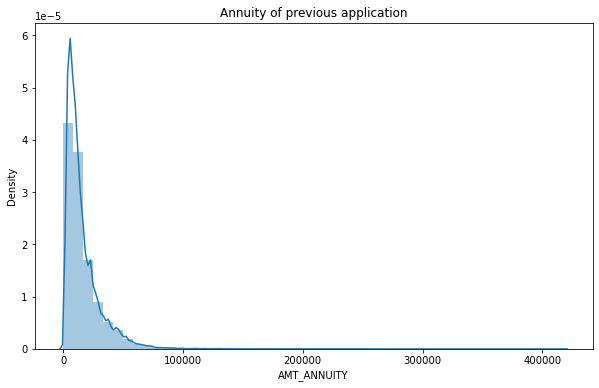

In [112]:
#Loan Annuity of previous application

plt.figure(figsize=(10,6))
plt.title('Annuity of previous application')
sns.distplot(df_o.AMT_ANNUITY)
plt.show()

In [113]:
df_o.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

### Bivariate analysis on previous application data 

The distribution is right skewed and maximum annuity amount is in range of 6k to 20k

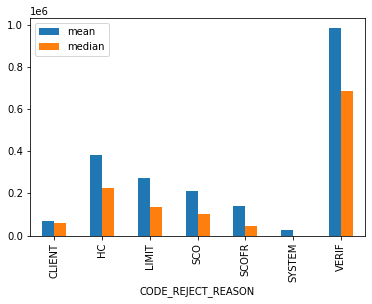

In [114]:
#Checking Clients amount of loan asked vs reason of reject

df_o.groupby('CODE_REJECT_REASON')['AMT_APPLICATION'].aggregate(['mean','median']).plot.bar()
plt.show()

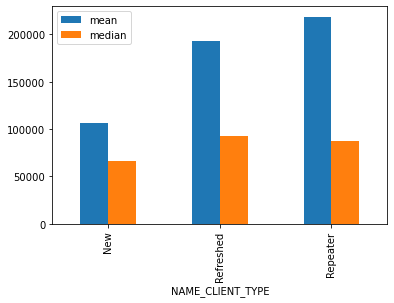

In [115]:
#Checking Clients type vs credited amount

df_o.groupby('NAME_CLIENT_TYPE')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar()
plt.show()

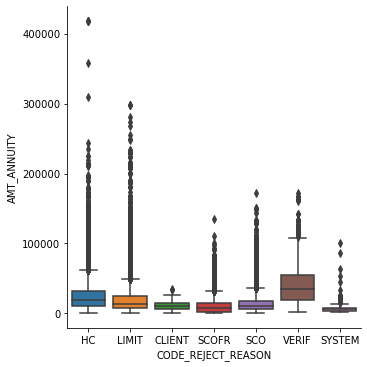

In [116]:
#Checking Reason of loan rejection vs Annuity amount
sns.catplot(x ='CODE_REJECT_REASON', y ='AMT_ANNUITY', kind = "box", data = df_o)
plt.show()

Lot of outliers detected in almost every rejection reasons except CLIENT reason. Most of the annuity amount is below 20k

In [117]:
#Getting the top 10 correlation in previous application
corr=df_o.corr()
corr_df_o = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_o.columns=['Col1','Col2','Correlation']
corr_df_o.dropna(subset=['Correlation'],inplace=True)
corr_df_o['Absolute_value_Correlation']=corr_df_o['Correlation'].abs()
corr_df_o = corr_df_o.sort_values(by=['Absolute_value_Correlation'], ascending=False)
corr_df_o.head(10)

,Col1,Col2,Correlation,Absolute_value_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927777,0.927777
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803504,0.803504
173,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


It can be observed that AMT_CREDIT has strong positive correlation with AMT_GOODS_PRICE	, AMT_APPLICATION, AMT_ANNUITY, CNT_PAYMENT 

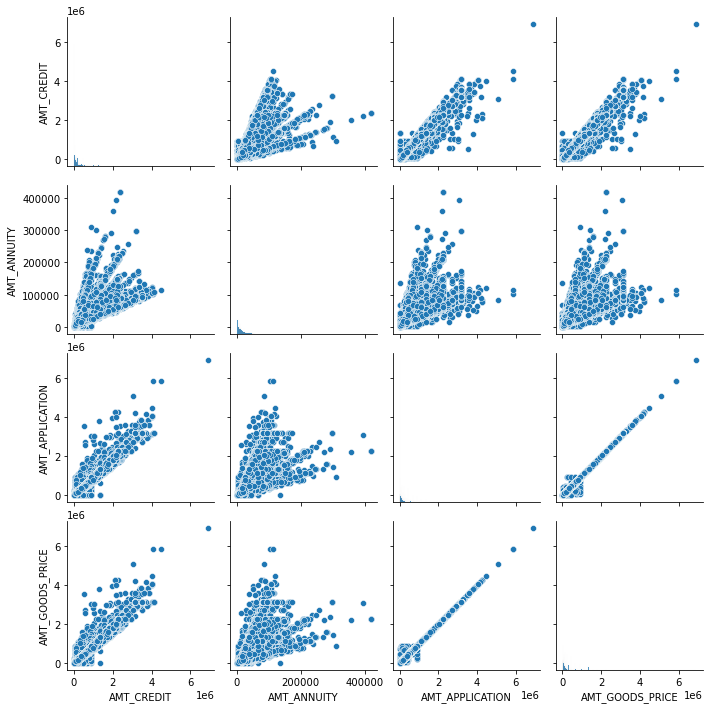

In [118]:
#bivariate analysis of previous application variables
sns.pairplot(df_o[['AMT_CREDIT','AMT_ANNUITY','AMT_APPLICATION','AMT_GOODS_PRICE']])
plt.show()

It can be observed that all these four variables has strong positive correlation with each other.

The amount of credit client asked for is strongly influenced by the price of the good. 

Also the annuity increases with amount of loan application and credited amount.

### Merging the application and previous application data

In [150]:
df = pd.merge(df_c, df_o, how='left', on=['SK_ID_CURR'])

In [151]:
df.shape

(1430155, 108)

In [152]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 108 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE_x             object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

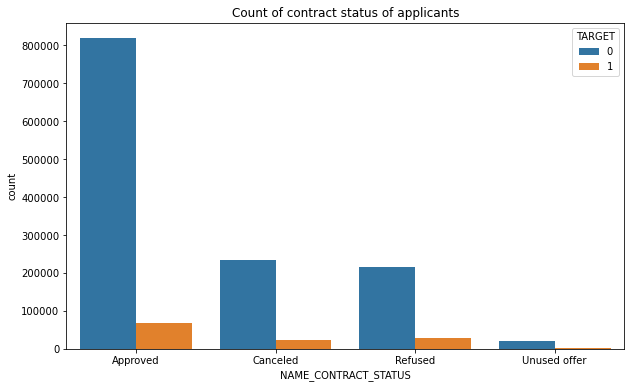

In [130]:
#Status of loans of previous applicants who have applied for loan again 
#Target=1 : Client with payment difficulties
#Target=0 : No payment difficulties

plt.figure(figsize=(10,6))
plt.title('Count of contract status of applicants')
sns.countplot(data=df, x="NAME_CONTRACT_STATUS", hue='TARGET')
plt.show()

Most of the applications from the previous data has been approved for loans. Approved from the previous application has the lowest payment difficulties

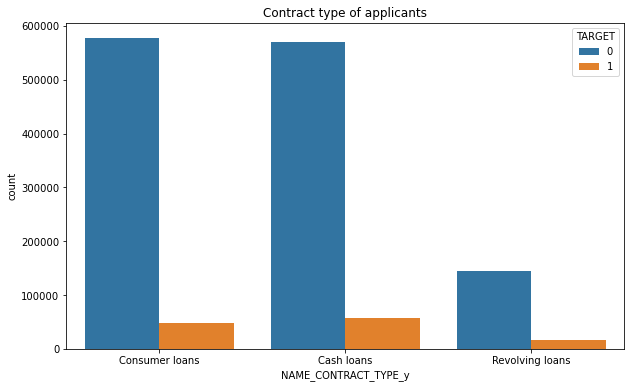

In [153]:
#Type of loans of previous applicants who have applied for loan again 
#Target=1 : Client with payment difficulties
#Target=0 : No payment difficulties

plt.figure(figsize=(10,6))
plt.title('Contract type of applicants')
sns.countplot(data=df, x="NAME_CONTRACT_TYPE_y", hue='TARGET')
plt.show()

Most of the applications from the previous data were for Cash and Consumer loands. Cash and Consumer loan applicants have the lowest payment difficulties

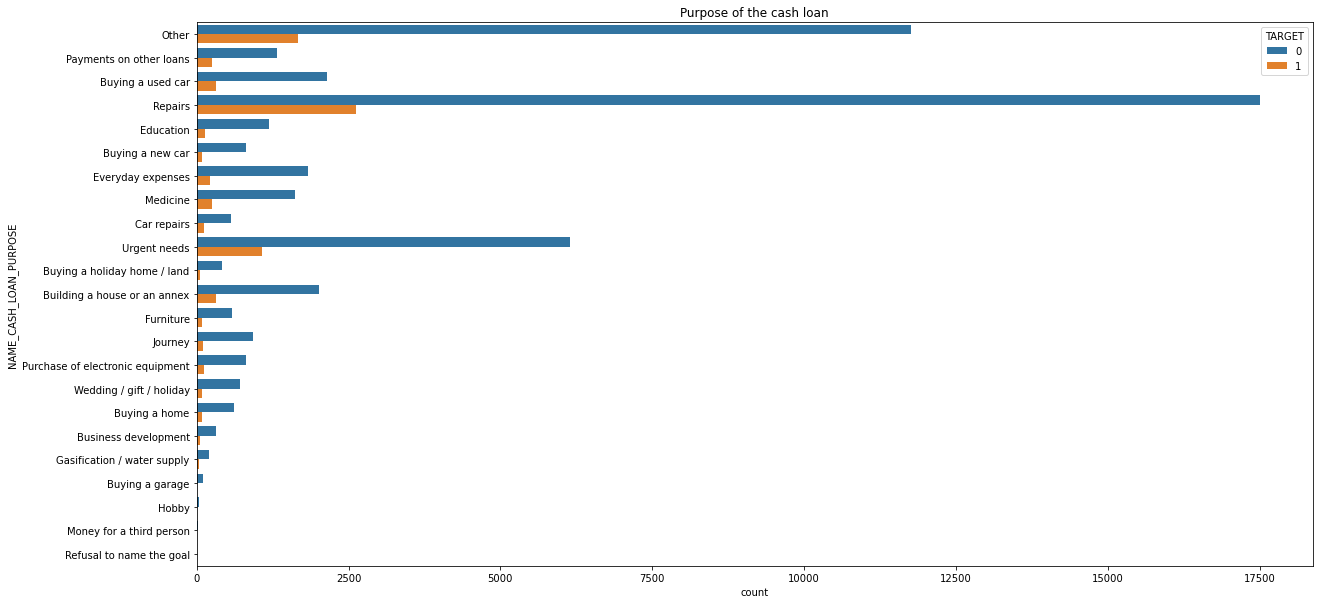

In [163]:
#Purpose of cash loans of previous applicants who have applied for loan again 
#Target=1 : Client with payment difficulties
#Target=0 : No payment difficulties

plt.figure(figsize=(20,10))
plt.title('Purpose of the cash loan')
ax = sns.countplot(data=df, y="NAME_CASH_LOAN_PURPOSE", hue='TARGET')
plt.show()

In [179]:
df[df.TARGET==1].NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

Repairs                             33.802817
Other                               21.617780
Urgent needs                        13.981135
Building a house or an annex         4.186587
Buying a used car                    4.109058
Payments on other loans              3.256235
Medicine                             3.243313
Everyday expenses                    2.791058
Education                            1.809019
Car repairs                          1.641039
Purchase of electronic equipment     1.511823
Journey                              1.434294
Wedding / gift / holiday             1.214627
Furniture                            1.098333
Buying a home                        1.085412
Buying a new car                     1.033725
Buying a holiday home / land         0.710686
Business development                 0.594392
Gasification / water supply          0.581470
Hobby                                0.116294
Buying a garage                      0.090451
Money for a third person          

Purpose of loan statement with Repairs, Urgent needs and other have the most contribution in defaulting loan